In [24]:
import pandas as pd
import numpy as np
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vatsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
# Example: loading a spam dataset
data = pd.read_csv("spam.csv", encoding="latin-1")
data = data[['v1','v2']]   # keep only label and message columns
data.columns = ['label', 'message']
print(data.head())


  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [26]:
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()                                    # lowercase
    text = re.sub(r'\d+', '', text)                        # remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    text = " ".join([ps.stem(word) for word in text.split() if word not in stop_words])
    return text

data['cleaned_message'] = data['message'].apply(clean_text)
print(data.head())


  label                                            message  \
0   ham  Go until jurong point, crazy.. Available only ...   
1   ham                      Ok lar... Joking wif u oni...   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3   ham  U dun say so early hor... U c already then say...   
4   ham  Nah I don't think he goes to usf, he lives aro...   

                                     cleaned_message  
0  go jurong point crazi avail bugi n great world...  
1                              ok lar joke wif u oni  
2  free entri wkli comp win fa cup final tkt st m...  
3                u dun say earli hor u c alreadi say  
4          nah dont think goe usf live around though  


In [27]:
vectorizer = TfidfVectorizer(max_features=3000)  # limit vocab size
X = vectorizer.fit_transform(data['cleaned_message']).toarray()
y = data['label'].map({'ham':0, 'spam':1})       # convert labels to 0/1


In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [29]:
model = MultinomialNB()
model.fit(X_train, y_train)


,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [30]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9766816143497757

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.83      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.95      1115
weighted avg       0.98      0.98      0.98      1115


Confusion Matrix:
 [[965   0]
 [ 26 124]]


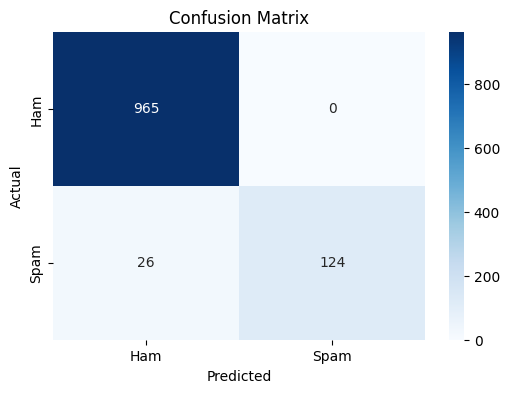

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham','Spam'], yticklabels=['Ham','Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


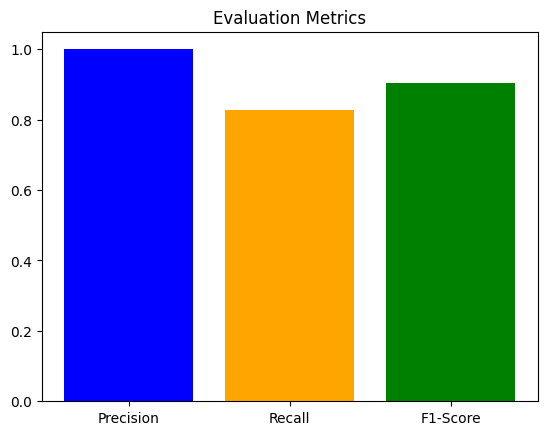

In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

scores = {'Precision': precision, 'Recall': recall, 'F1-Score': f1}
plt.bar(scores.keys(), scores.values(), color=['blue','orange','green'])
plt.title("Evaluation Metrics")
plt.show()


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "SVM": SVC(kernel='linear'),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

results = {}
for name, clf in models.items():
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    results[name] = accuracy_score(y_test, preds)

print(results)


{'Naive Bayes': 0.9766816143497757, 'Logistic Regression': 0.9515695067264573, 'SVM': 0.9802690582959641, 'Random Forest': 0.97847533632287}


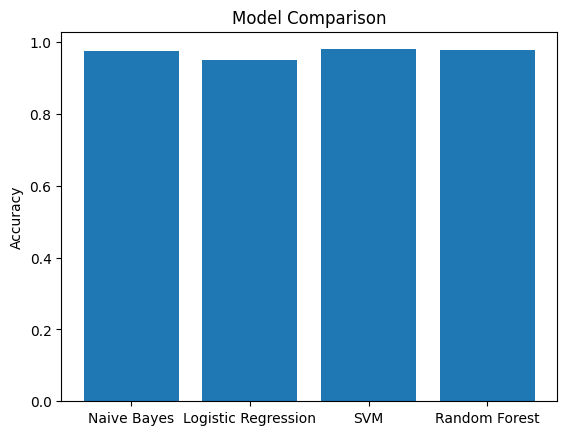

In [34]:
plt.bar(results.keys(), results.values())
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.show()


In [35]:
import pickle
pickle.dump(model, open("spam_model.pkl", "wb"))
pickle.dump(vectorizer, open("vectorizer.pkl", "wb"))


In [36]:
!pip install streamlit


Defaulting to user installation because normal site-packages is not writeable
